<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/Forest_fire_brazil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest fire in Brazil with pandas

Lets work a little bit with data structures from pandas:
1. Series
2. Dataframes

# import necessary modules/libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ls = [60.33,72.23,-20.5,14.05]
type(ls)

list

## Series
Series is a one dimensional array that contains an array of data and an array of labels, called index.

In [8]:
# Creating series without specifying index
series1 = pd.Series(ls)
series1

0    60.33
1    72.23
2   -20.50
3    14.05
dtype: float64

In [9]:
type(series1)

pandas.core.series.Series

In [11]:
series1.values

array([ 60.33,  72.23, -20.5 ,  14.05])

In [12]:
series1.index

RangeIndex(start=0, stop=4, step=1)

In [13]:
series2 = pd.Series(ls, index=['a','b','c','d'])
series2

a    60.33
b    72.23
c   -20.50
d    14.05
dtype: float64

In [14]:
series2.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [15]:
series1[2]

-20.5

In [16]:
series2['d']

14.05

In [17]:
series2.values

array([ 60.33,  72.23, -20.5 ,  14.05])

In [19]:
# slicing
series3 = series2[series2>20]
series3

a    60.33
b    72.23
dtype: float64

## Creating a dataset passing a dictionary as parameters.

In [21]:
dict1 = {'Football':5400, 'Tennis':120, 'Swimming' :13, 'Volleyball':1550}
dict1

{'Football': 5400, 'Tennis': 120, 'Swimming': 13, 'Volleyball': 1550}

In [22]:
series4 = pd.Series(dict1)
series4

Football      5400
Tennis         120
Swimming        13
Volleyball    1550
dtype: int64

In [23]:
series4.index

Index(['Football', 'Tennis', 'Swimming', 'Volleyball'], dtype='object')

In [24]:
series4.values

array([5400,  120,   13, 1550])

In [27]:
# create a list
sports = ['Football','Tennis','Swimming','Basketball']

In [28]:
series5 = pd.Series(dict1, index=sports)
series5

Football      5400.0
Tennis         120.0
Swimming        13.0
Basketball       NaN
dtype: float64

In [30]:
pd.isnull(series5).sum()

1

In [32]:
pd.notnull(series5).sum()

3

In [33]:
series4 + series5

Basketball        NaN
Football      10800.0
Swimming         26.0
Tennis          240.0
Volleyball        NaN
dtype: float64

In [34]:
series4

Football      5400
Tennis         120
Swimming        13
Volleyball    1550
dtype: int64

In [35]:
series4.index.name = 'sport'
series4.name = 'players'
series4

sport
Football      5400
Tennis         120
Swimming        13
Volleyball    1550
Name: players, dtype: int64

In [38]:
series4[series4 == 13]

sport
Swimming    13
Name: players, dtype: int64

In [39]:
series4.loc['Swimming']

13

In [41]:
series4.iloc[2]

13

In [42]:
series5

Football      5400.0
Tennis         120.0
Swimming        13.0
Basketball       NaN
dtype: float64

In [43]:
list(series5[pd.isnull(series5) == True].index)

['Basketball']

## Dataframes
Dataframes are basically tables!!

In [44]:
from pandas import DataFrame

In [46]:
data = {'State': ['Santa Catarina', 'Parana', 'Goias', 'Amazon'],
        'Year': [2002,2003,2004,2005],
        'Population':[1.5,1.7,3.6,2.4]
        }
data

{'State': ['Santa Catarina', 'Parana', 'Goias', 'Amazon'],
 'Year': [2002, 2003, 2004, 2005],
 'Population': [1.5, 1.7, 3.6, 2.4]}

In [47]:
df = DataFrame(data)
df

,State,Year,Population
0,Santa Catarina,2002,1.5
1,Parana,2003,1.7
2,Goias,2004,3.6
3,Amazon,2005,2.4


In [48]:
type(df)

pandas.core.frame.DataFrame

In [49]:
df['Points'] = [3,5,6,46]
df

,State,Year,Population,Points
0,Santa Catarina,2002,1.5,3
1,Parana,2003,1.7,5
2,Goias,2004,3.6,6
3,Amazon,2005,2.4,46


In [50]:
df['Points'][3]= 61345
df

<ipython-input-50-1b0e6fb426b1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Points'][3]= 61345


,State,Year,Population,Points
0,Santa Catarina,2002,1.5,3
1,Parana,2003,1.7,5
2,Goias,2004,3.6,6
3,Amazon,2005,2.4,61345


In [51]:
df['State']

0    Santa Catarina
1            Parana
2             Goias
3            Amazon
Name: State, dtype: object

In [52]:
df.State

0    Santa Catarina
1            Parana
2             Goias
3            Amazon
Name: State, dtype: object

In [53]:
df[['State','Points']]

,State,Points
0,Santa Catarina,3
1,Parana,5
2,Goias,6
3,Amazon,61345


In [54]:
df.describe()

,Year,Population,Points
count,4.000000,4.000000,4.000000
mean,2003.500000,2.300000,15339.750000
std,1.290994,0.948683,30670.166692
min,2002.000000,1.500000,3.000000
25%,2002.750000,1.650000,4.500000
50%,2003.500000,2.050000,5.500000
75%,2004.250000,2.700000,15340.750000
max,2005.000000,3.600000,61345.000000


# Lets work with the forest fire dataset

In [55]:
data = pd.read_csv('amazon.csv', encoding='iso-8859-1')
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [56]:
data.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

## read csv and change date column to datetime

In [60]:
data = pd.read_csv('amazon.csv', encoding='iso-8859-1',parse_dates=['date'])
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [61]:
data.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [62]:
data.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


In [63]:
data.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [64]:
data.shape

(6454, 5)

## Check for duplicate data and drop them

In [65]:
dup_data = data.duplicated().any()
dup_data

True

In [66]:
data = data.drop_duplicates()

In [67]:
data.shape

(6422, 5)

In [68]:
6454-6422

32

In [69]:
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [82]:
data['month_new'] = data['month'].map({'Janeiro':1,
                                      'Fevereiro':2,
                                       'Março':3,
                                       'Abril':4,
                                       'Maio': 5,
                                       'Junho': 6,
                                       'Julho': 7,
                                       'Agosto': 8,
                                       'Setembro':9,
                                       'Outubro': 10,
                                       'Novembro': 11,
                                       'Dezembro': 12
                                       })

<ipython-input-82-dadec99fda92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month_new'] = data['month'].map({'Janeiro':1,


In [83]:
data

,year,state,month,number,date,month_new
0,1998,Acre,Janeiro,0.0,1998-01-01,1
1,1999,Acre,Janeiro,0.0,1999-01-01,1
2,2000,Acre,Janeiro,0.0,2000-01-01,1
3,2001,Acre,Janeiro,0.0,2001-01-01,1
4,2002,Acre,Janeiro,0.0,2002-01-01,1
...,...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01,12
6450,2013,Tocantins,Dezembro,85.0,2013-01-01,12
6451,2014,Tocantins,Dezembro,223.0,2014-01-01,12
6452,2015,Tocantins,Dezembro,373.0,2015-01-01,12


# In which month maximum numbers of Forest Fires were reported.

In [84]:
data.groupby('month_new')['number'].sum()

month_new
1     47681.844
2     30839.050
3     30709.405
4     28184.770
5     34725.363
6     55997.675
7     92319.113
8     88050.435
9     58578.305
10    88681.579
11    85508.054
12    57535.480
Name: number, dtype: float64

In [85]:
data1 = data.groupby('month_new')['number'].sum().reset_index()

In [86]:
data1

,month_new,number
0,1,47681.844
1,2,30839.050
2,3,30709.405
3,4,28184.770
4,5,34725.363
5,6,55997.675
6,7,92319.113
7,8,88050.435
8,9,58578.305
9,10,88681.579


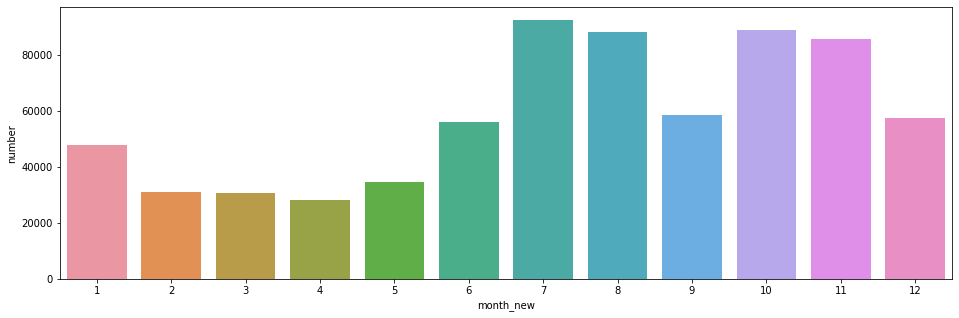

In [87]:
plt.figure(figsize =(16,5))
sns.barplot(x='month_new', y = 'number', data = data1);

In [77]:
import datetime as dt

In [79]:
data2 = data.groupby('month_new')['number'].sum()

In [80]:
data['date'].dt.month

0       1
1       1
2       1
3       1
4       1
       ..
6449    1
6450    1
6451    1
6452    1
6453    1
Name: date, Length: 6422, dtype: int64

In [ ]:
data2 = data.groupby()

## which year maximum numbers of forest fire were reported?

In [88]:
data3 = data.groupby('year')['number'].sum().reset_index()

In [89]:
data3

,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29054.612
4,2002,37390.600
5,2003,42760.674
6,2004,38450.163
7,2005,35004.965
8,2006,33824.161
9,2007,33028.413


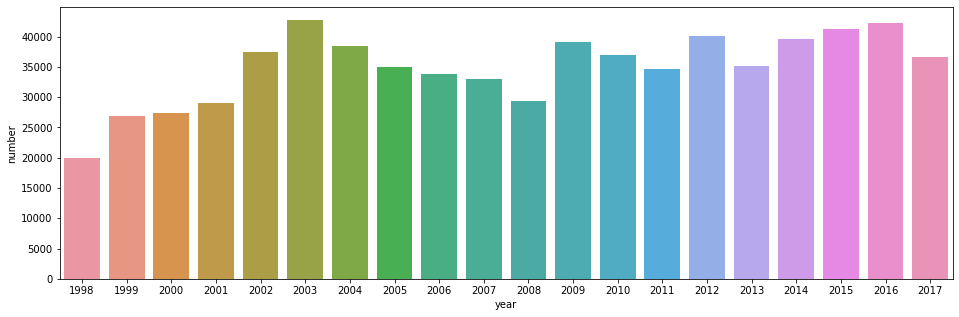

In [90]:
plt.figure(figsize =(16,5))
sns.barplot(x='year', y = 'number', data = data3);

In [91]:
data3.max()

year       2017.000
number    42760.674
dtype: float64

In [92]:
data3[data3['number'] == 42760.674]

,year,number
5,2003,42760.674


In [93]:
data.columns

Index(['year', 'state', 'month', 'number', 'date', 'month_new'], dtype='object')

In [94]:
data4 = data.groupby('state')['number'].sum().reset_index()
data4

,state,number
0,Acre,18464.030
1,Alagoas,4606.000
2,Amapa,21831.576
3,Amazonas,30650.129
4,Bahia,44746.226
5,Ceara,30428.063
6,Distrito Federal,3561.000
7,Espirito Santo,6546.000
8,Goias,37695.520
9,Maranhao,25129.131


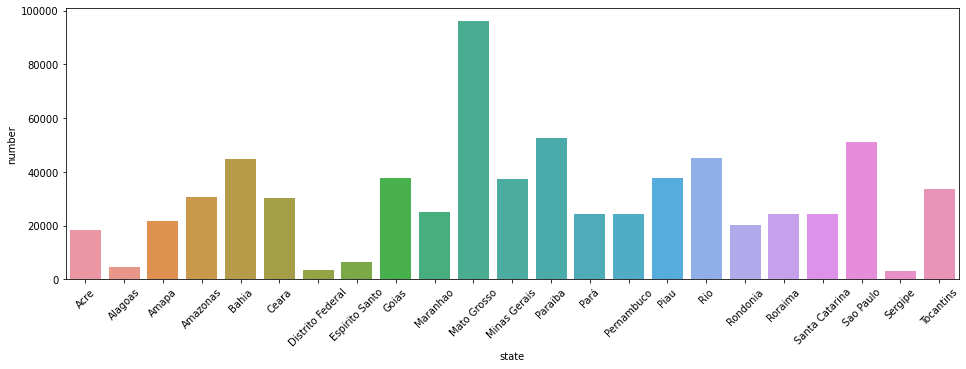

In [96]:
plt.figure(figsize=(16,5))
sns.barplot(x='state', y= 'number', data = data4)
plt.xticks(rotation=45)
plt.show();
     